# Desafio RenovaBR


● A diversidade nas candidaturas aumentou entre 2020 e 2024?
● Mulheres, pessoas negras e indígenas conseguiram se eleger mais em
2024?
● Houve diferenças significativas no financiamento (valor arrecadado) por
gênero ou raça?
● Quais partidos e capitais elegeram o maior número de representantes
diversos?
● Em quais capitais houve maior avanço ou retrocesso na diversidade dos
eleitos?


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [7]:
df = pd.read_excel('base_desafio_renovaBR.xlsx',sheet_name='dados')
df['Minoria'] = ((df['Genero'].eq('FEM.')) | df['Raca'].isin(['PRETA', 'PARDA', 'INDÍGENA']))


In [8]:
df.shape

(30000, 13)

### A diversidade nas candidaturas aumentou entre 2020 e 2024?
Embora tenhamos observado uma ligeira evolução percentual na diversidade - de 72,9% para 73,7% - é importante destacar que o número absoluto de candidatos diminuiu significativamente em 41,6% entre 2020 e 2024. Isso significa que, apesar do aumento proporcional, na prática houve uma redução no total de candidatos diversos.


Quando olhamos para as categorias separadas notamos realmente uma queda em sua maioria, exceto pelas Mulheres Amarelas e Mulheres Indígenas que aumentaram em 1 e 9 candidatos respectivamente 



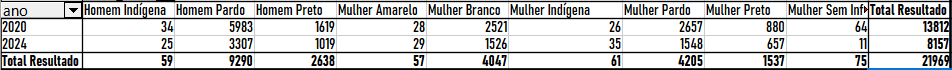

In [9]:
#* A diversidade nas candidaturas aumentou entre 2020 e 2024?
diversidade = df.groupby(['ano', 'Minoria']).size().unstack(fill_value=0)
diversidade['Total'] = diversidade.sum(axis=1)
diversidade['Percentual'] = diversidade[True] / (diversidade[True] + diversidade[False]) * 100
diferenca_percentual = ((diversidade.loc[2024, 'Total'] - diversidade.loc[2020, 'Total']) / diversidade.loc[2020, 'Total']) * 100

In [6]:
print(diversidade,diferenca_percentual)

Minoria  False   True  Total  Percentual
ano                                     
2020      5130  13812  18942   72.917327
2024      2901   8157  11058   73.765600 -41.62179284130504


### Mulheres, pessoas negras e indígenas conseguiram se eleger mais em 2024?

In [13]:
#● Mulheres, pessoas negras e indígenas conseguiram se eleger mais em 2024?
df['Eleito'] = df['Resultado_Eleitoral'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])
eleitos = df[df['Eleito'] == True]
eleitos_diversidade = eleitos.groupby(['ano', 'Minoria']).size().unstack(fill_value=0)
eleitos_diversidade['Total'] = eleitos_diversidade.sum(axis=1)
eleitos_diversidade['Percentual_Minoria'] = eleitos_diversidade[True] / eleitos_diversidade['Total'] * 100
eleitos_diversidade['Percentual_NaoMinoria'] = eleitos_diversidade[False] / eleitos_diversidade['Total'] * 100


print(eleitos_diversidade)


Minoria  False  True  Total  Percentual_Minoria  Percentual_NaoMinoria
ano                                                                   
2020       296   339    635           53.385827              46.614173
2024       307   340    647           52.550232              47.449768


Em quantidade aumentamos em 1 apenas mas se olharmos o percentual de candidatosXeleitos dessas categorias conseguimos ver um avanço geral, saímos de 2,45% de candidatos tidos como minoria eleitos para 4,17%, se tivéssemos essa porcentagem em 2020 teríamos cerca de 550 candidatos eleitos 

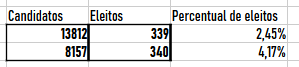

In [17]:
map_genero = {
    'MASC.': 'Homem',
    'FEM.': 'Mulher'
}

# Dicionário de tradução de raça
map_raca = {
    'BRANCA': 'Branco',
    'PRETA': 'Preto',
    'PARDA': 'Pardo',
    'AMARELA': 'Amarelo',
    'INDÍGENA': 'Indígena',
    'SEM INFORMAÇÃO': 'Sem Informação',
    'Não Divulgável': 'Não Divulgável'
}


df['Genero_formatado'] = df['Genero'].map(map_genero)
df['Raca_formatada'] = df['Raca'].map(map_raca)
df['Raca_Genero'] = df['Genero_formatado'] + ' ' + df['Raca_formatada']

In [18]:
colunas_exportar = df[['Raca_Genero']]

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a') as writer:
    colunas_exportar.to_excel(writer, sheet_name='Raca_Genero', index=False)

### Quais partidos e capitais elegeram o maior número de representantes diversos?

2020:

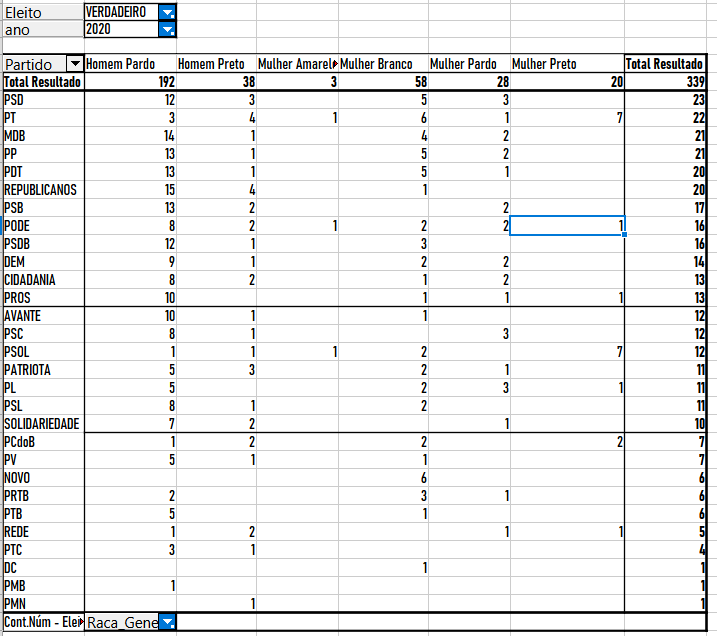


2024:

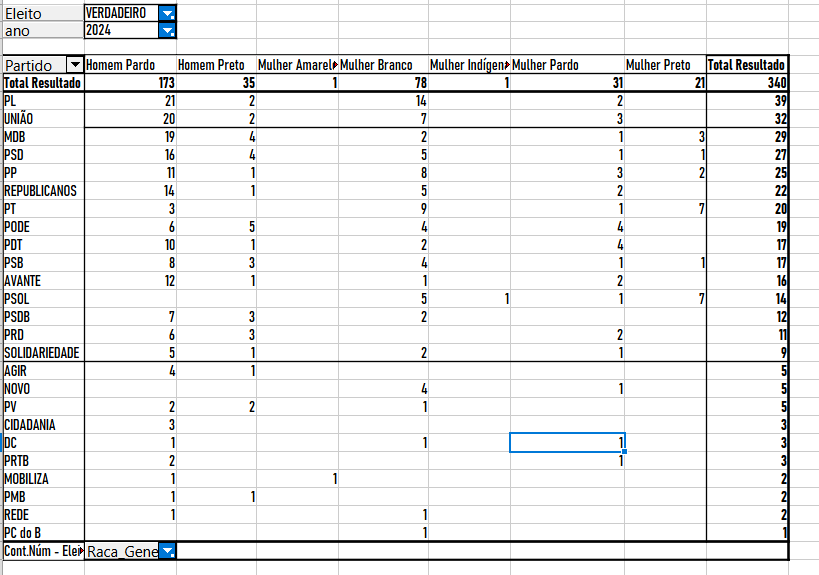


Como podemos ver em 2020 os partidos que lideraram as eleições nesse quesito foram PSD, PT, MDB, PP e PDT.

Em 2024 podemos ver que esses todos ainda mantiveram grandes números mas foram superados pelo PL e pelo União


Já olhando para as capitais temos os seguintes dados:

2020:

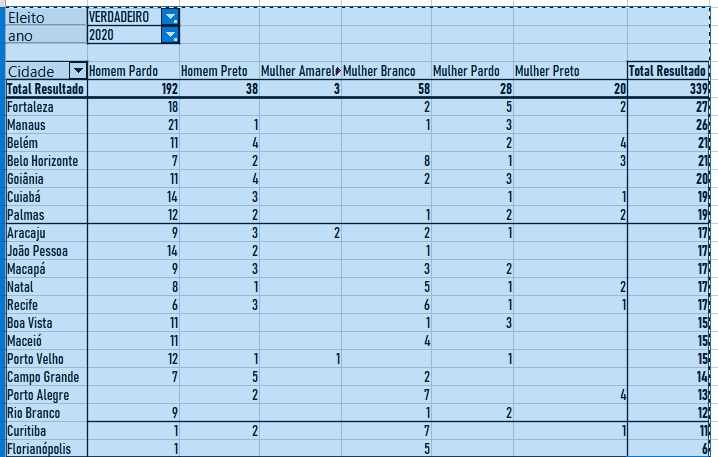

em 2020 vemos as seguintes capitais liderando o ranking: Fortaleza, Manaus, Belém, Belo Horizonte e Cuiabá

2024:

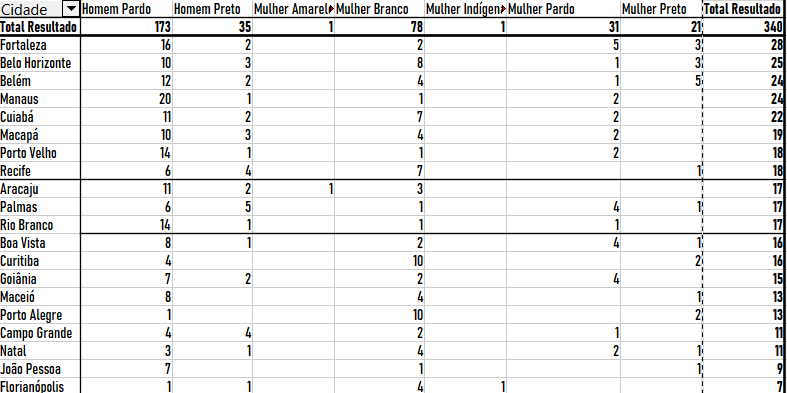

em 2024 vemos as mesmas capitais mas uma mudança de ordem, Belo Horizonte vem pra segundo e Belém em terceiro, seguidos de Manaus em quarto e Cuiabá em quinto, Fortaleza se manteve em primeiro

In [33]:
# Filtra eleitos que são minoria
eleitos_minoria = eleitos[eleitos['Minoria'] == True]

# Agrupa por UF e ano
eleitos_minoria_capitais = eleitos_minoria.groupby(['Cidade', 'ano']).size().reset_index(name='Qtd_Minoria')
eleitos_minoria_2020 = eleitos_minoria_capitais[eleitos_minoria_capitais['ano'] == 2020][['Cidade', 'Qtd_Minoria']].rename(columns={'Qtd_Minoria': 'Minoria_2020'})
eleitos_minoria_2024 = eleitos_minoria_capitais[eleitos_minoria_capitais['ano'] == 2024][['Cidade', 'Qtd_Minoria']].rename(columns={'Qtd_Minoria': 'Minoria_2024'})
comparacao_minoria = pd.merge(eleitos_minoria_2020, eleitos_minoria_2024, on='Cidade', how='outer').fillna(0)
comparacao_minoria['Diferenca'] = comparacao_minoria['Minoria_2024'] - comparacao_minoria['Minoria_2020']
print(comparacao_minoria.sort_values(by='Diferenca', ascending=False))


            Cidade  Minoria_2020  Minoria_2024  Diferenca
19      Rio Branco            12            17          5
6         Curitiba            11            16          5
1   Belo Horizonte            21            25          4
2            Belém            21            24          3
17     Porto Velho            15            18          3
5           Cuiabá            19            22          3
11          Macapá            17            19          2
3        Boa Vista            15            16          1
8        Fortaleza            27            28          1
18          Recife            17            18          1
7    Florianópolis             6             7          1
0          Aracaju            17            17          0
16    Porto Alegre            13            13          0
13          Manaus            26            24         -2
12          Maceió            15            13         -2
15          Palmas            19            17         -2
4     Campo Gr

### Em quais capitais houve maior avanço ou retrocesso na diversidade dos eleitos?
Como podemos ver acima, Rio Branco, Curitiba, Belo Horizonte, Belém e Porto Velho lideram o ranking de avanço na diversidade.
Do outro lado podemos notar que João Pessoa teve uma queda de 8 candidatos, a maior de todas seguida de Natal que perdeu 6 candidato.